In [1]:
%gui qt
from skimage import data
import napari
import numpy as np

In [2]:
temp=np.load('C:\\temp\\HammerDF_F.npy')

In [8]:
Pos_DF=temp*100
Pos_DF[Pos_DF<3]=0

In [2]:
import tifffile as tiff
mean_img=tiff.imread('C:\\temp\\MAX_14-16_HammerTime.tif')

In [5]:
mean_img=mean_img[400:-1,:,:]
mean_img=mean_img.mean(axis=0)

In [9]:
viewer = napari.view_image(Pos_DF[400:-50],name='DF')

In [10]:
viewer.add_image(mean_img,name='mean_img')

<Image layer 'mean_img' at 0x27580e41d88>

In [ ]:
viewer = napari.view_image(Pos_DF[50:-50],name='DF')

In [ ]:
with napari.gui_qt():
    viewer = napari.view_image(Pos_DF[50:-50],name='DF')

In [3]:
img_std=np.std(mean_img,axis=0)

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
plt.imshow(img_std>150)

NameError: name 'img_std' is not defined

<Figure size 720x720 with 0 Axes>

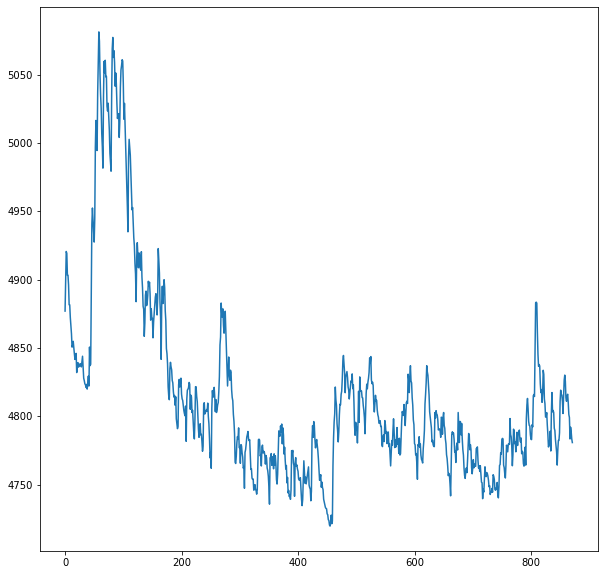

In [6]:
plt.figure(figsize=(10,10))
plt.plot(mean_img.mean(axis=(1,2)))

In [5]:
from scipy.signal import butter,filtfilt# Filter requirements.
T = 5.0         # Sample Period
fs = 4.0       # sample rate, Hz
cutoff = 1      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hznyq = 0.5 * fs  # Nyquist Frequencyorder = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

nyq = 0.5 * fs  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

In [6]:
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

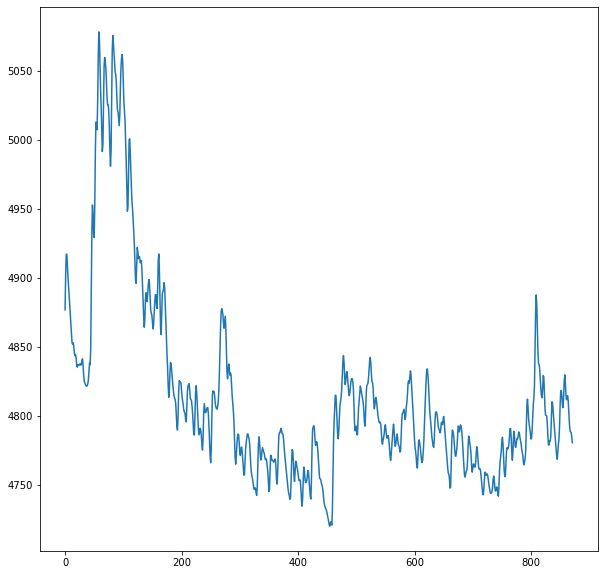

In [7]:
mean_resp=mean_img.mean(axis=(1,2))
plt.figure(figsize=(10,10))
plt.plot(butter_lowpass_filter(mean_resp, cutoff, fs, order))

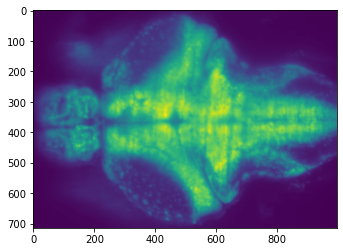

In [10]:
plt.imshow(mean_img)

In [11]:
mean_img.shape

(714, 996)

In [10]:
tiff.imwrite('C:\\Temp\\Mean_Hammer',mean_img[400:-50].mean(axis=0))

In [3]:
import tifffile as tiff
mean_img=tiff.imread('C:\\temp\\Mean_Hammer')

In [8]:
dims=mean_img.shape
temp=np.zeros(dims,dtype='float32')
for ij in range(0,mean_img.shape[1]):
    for ik in range(0,mean_img.shape[2]):
        if img_std[ij,ik]>150:
            mean_resp=mean_img[:,ij,ik]
            mean_resp=butter_lowpass_filter(mean_resp, cutoff, fs, order)
            F0=np.convolve(mean_resp, np.ones((30,))/30, mode='same')
            F0=butter_lowpass_filter(F0,cutoff, fs, order))
            temp[:,ij,ik]=(mean_resp-F0)/F0        

In [12]:
mean_image=mean_img[400:-50].mean(axis=0)

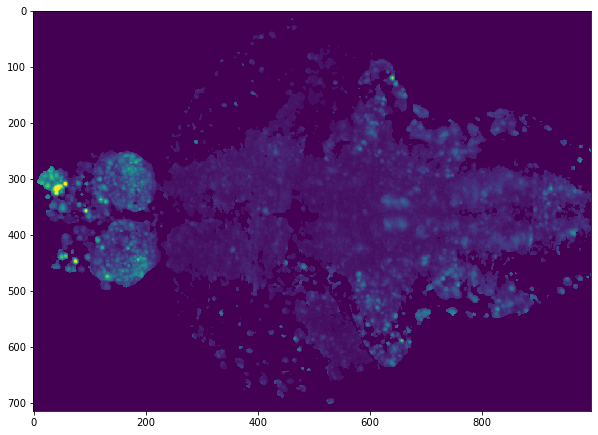

In [18]:
plt.figure(figsize=(10,10))
plt.imshow(temp[399:-50].max(axis=0),vmin=0,vmax=0.5)

In [ ]:
np.save('C:\\Temp\\Hammer_DF_filter.npy',temp)

In [4]:
temp=np.load('C:\\Temp\\Hammer_DF_filter.npy')

In [21]:
viewer = napari.view_image(temp,name='mean_img')

In [5]:
Pos_DF=temp*100
Pos_DF[Pos_DF<1]=0

In [6]:
viewer = napari.view_image(Pos_DF,name='DF')

In [7]:
viewer.add_image(Pos_DF[399:-50],name='DF')

<Image layer 'DF' at 0x2dd31346848>

In [13]:
viewer.add_image(mean_image,name='mean_img')

NameError: name 'viewer' is not defined

In [12]:
Pos_DF.max()

137.47943

In [15]:
tiff.imwrite('C:\\Temp\\DF_Hammer.tif',(Pos_DF[30:-30]*1000).astype('uint16'))

In [14]:
tiff.imwrite('C:\\Temp\\Mean_Hammer.tif',mean_img.astype('uint16'))